[INFO] Loaded 21 descriptor(s) from ./mapping_schemes
[DEBUG] Keys in MATLAB dict: dict_keys(['__header__', '__version__', '__globals__', 'v', 't', 'Ncell', 'achDensity', 'Dt', 'leadTime', 'stimTime', 'lagTime', 'HR_bl', 'HR_stim', 'HRnorm', 'ach_nj'])
[DEBUG] Shapes before squeeze: t = (1, 699941) v = (100, 699941)
[DEBUG] Shapes after squeeze: t = (699941,) v = (100, 699941)
Selected mapping: matlab_mapping_310
Score: 3
Shape of signals: 100 channels, 699941 samples


C:\Users\MaxHaberbusch\AppData\Local\Temp\ipykernel_1236\776497637.py:43: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\MaxHaberbusch\anaconda3\envs\xlstm\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


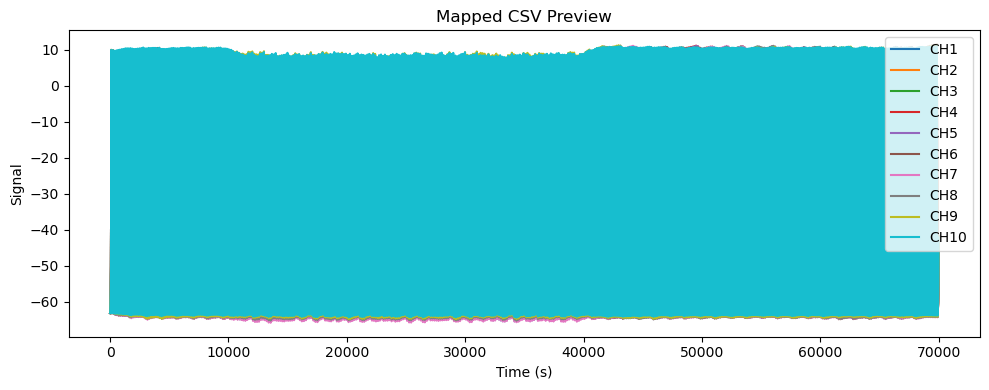

✅ Saved standardized data to: output\out_0_10.mat


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 3

import matplotlib.pyplot as plt
from pathlib import Path
from sparcfuse.utils import match_best_mapping, load_all_descriptors, save_standardized_output

# Load all descriptor files from folder
descriptors = load_all_descriptors()

# File to convert
filepath = "../downloads/out_0_10.mat"
filename = Path(filepath).name

# Optional: specify SPARC ID for faster mapping
# Works also without sparc_id as the other csv mapping schemes works well on this CSV file
result = match_best_mapping(descriptors, filepath, sparc_id=310)

# Check if mapping was successful
if result["descriptor"] is None:
    raise RuntimeError("No suitable mapping descriptor found.")

# Show mapping result
print("Selected mapping:", result['descriptor']['id'])
print("Score:", result['score'])

# Preview signal
time = result['result']['time']
signals = result['result']['signals']

print(f"Shape of signals: {len(signals)} channels, {len(time)} samples")

plt.figure(figsize=(10, 4))
for i, ch in enumerate(signals):
    if i >= 10:
        break
    plt.plot(time, ch, label=f"CH{i+1}")
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Mapped CSV Preview")
plt.legend()
plt.tight_layout()
plt.show()

# Save to standardized .npz format in ./output
output_dir = Path("../output")
output_dir.mkdir(parents=True, exist_ok=True)

output_path = output_dir / filename.replace(".csv", ".npz")

save_standardized_output(
    output_path=output_path,
    result_dict=result["result"],
    descriptor=result["descriptor"],
    original_filename=filename,
    annotations=result["result"].get("annotations", []),
    metadata_overrides=None,
    file_format="npz"
)

print(f"✅ Saved standardized data to: {output_path}")

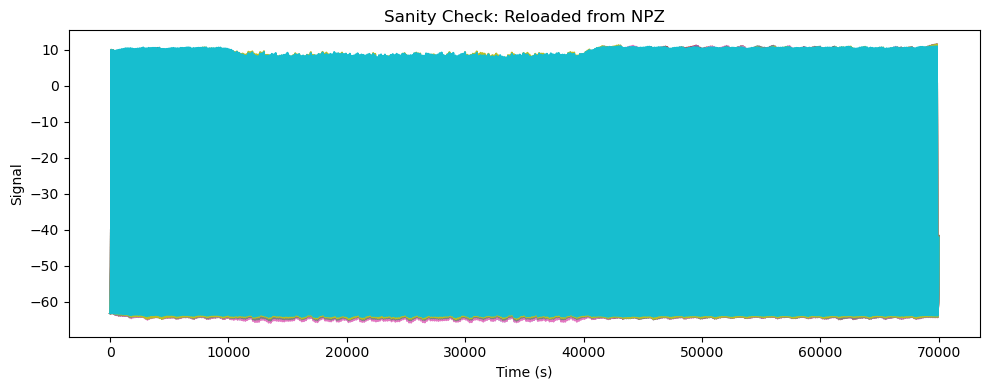

{'time_units': 'seconds', 'time_auto_generated': False, 'source_format': '.mat', 'database_id': 'unknown', 'sampling_frequency': np.float64(10.000000000059105), 'channel_names': ['CH1', 'CH2', 'CH3', 'CH4', 'CH5', 'CH6', 'CH7', 'CH8', 'CH9', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH16', 'CH17', 'CH18', 'CH19', 'CH20', 'CH21', 'CH22', 'CH23', 'CH24', 'CH25', 'CH26', 'CH27', 'CH28', 'CH29', 'CH30', 'CH31', 'CH32', 'CH33', 'CH34', 'CH35', 'CH36', 'CH37', 'CH38', 'CH39', 'CH40', 'CH41', 'CH42', 'CH43', 'CH44', 'CH45', 'CH46', 'CH47', 'CH48', 'CH49', 'CH50', 'CH51', 'CH52', 'CH53', 'CH54', 'CH55', 'CH56', 'CH57', 'CH58', 'CH59', 'CH60', 'CH61', 'CH62', 'CH63', 'CH64', 'CH65', 'CH66', 'CH67', 'CH68', 'CH69', 'CH70', 'CH71', 'CH72', 'CH73', 'CH74', 'CH75', 'CH76', 'CH77', 'CH78', 'CH79', 'CH80', 'CH81', 'CH82', 'CH83', 'CH84', 'CH85', 'CH86', 'CH87', 'CH88', 'CH89', 'CH90', 'CH91', 'CH92', 'CH93', 'CH94', 'CH95', 'CH96', 'CH97', 'CH98', 'CH99', 'CH100'], 'channel_units': ['unknown',

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load the .npz file
npz_path = Path("../output/out_0_10.npz")
data = np.load(npz_path, allow_pickle=True)

# Extract arrays
time = data["time"]
signals = data["signals"]
metadata = data["metadata"].item()  # metadata is saved as a Python dict
channel_names = metadata.get("channel_names", [f"CH{i+1}" for i in range(len(signals))])

# Plot
plt.figure(figsize=(10, 4))
for i, ch in enumerate(signals):
    if i >= 10:
        break
    plt.plot(time, ch, label=channel_names[i])
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Sanity Check: Reloaded from NPZ")
plt.tight_layout()
plt.show()

print(data['metadata'])

print("shape of time:", time.shape)
print("shape of signals:", signals.shape)